In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import spacy
import warnings
import re
import string
import random


from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer , TweetTokenizer
from nltk.stem import WordNetLemmatizer ,PorterStemmer
from nltk.corpus import stopwords
from collections import defaultdict
from collections import Counter
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import tensorflow as tf

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


nlp = spacy.load("en_core_web_sm")
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('twitter_training.csv')
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
df.shape

(74681, 4)

In [5]:
df.sample(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
49620,6118,FIFA,Irrelevant,Open my Gold 2 rewards in 5 minutes... two gua...
36765,8307,Microsoft,Positive,Malicious documents are not making new threats...
18565,9982,PlayStation5(PS5),Irrelevant,The Square really likes to give us everything ...
22723,4294,CS-GO,Irrelevant,"TRISTAT NEED THE BEST CROWD, INTERNATIONAL ECO..."
12234,8503,NBA2K,Positive,S / O @ NBA2K for Love. See you on 9 / 4 pic.t...
42026,10011,PlayerUnknownsBattlegrounds(PUBG),Neutral,one of the greatest kpop moments was at Isac 2...
52184,10564,RedDeadRedemption(RDR),Neutral,Red Dead Redemption 2 – There are all the lege...
49511,6100,FIFA,Negative,The absolute worst
11934,8452,NBA2K,Positive,Awesome man that was THIS game lol
6786,368,Amazon,Negative,"Amazon does me really dirty huh. Okay, I get i..."


In [6]:
df.nunique()

2401                                                     12447
Borderlands                                                 32
Positive                                                     4
im getting on borderlands and i will murder you all ,    69490
dtype: int64

In [7]:
df.ndim

2

In [8]:
print('The features are:', df.columns)

The features are: Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [9]:
print('Data Types:', df.dtypes)

Data Types: 2401                                                      int64
Borderlands                                              object
Positive                                                 object
im getting on borderlands and i will murder you all ,    object
dtype: object


In [10]:
df.describe(include='all')

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [11]:
def missing_duplicate(data):
  missing_values = data.isnull().sum()
  missing_percentage = (data.isnull().sum()) / len(data)
  duplicate_values = data.duplicated().sum()
  duplicate_percentage = (data.duplicated().sum()) / len(data)
  info = pd.DataFrame({'Missing_values': missing_values,
                       'Missing_values_percentage': missing_percentage,
                       'Duplicate_values': duplicate_values,
                       'Duplicate_values_percentage': duplicate_percentage})
  return info.T

In [12]:
missing_duplicate(df)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
Missing_values,0.000000,0.000000,0.000000,686.000000
Missing_values_percentage,0.000000,0.000000,0.000000,0.009186
Duplicate_values,2700.000000,2700.000000,2700.000000,2700.000000
Duplicate_values_percentage,0.036154,0.036154,0.036154,0.036154


In [13]:
# Droping duplicate  and null values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
missing_duplicate(df)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
Missing_values,0.0,0.0,0.0,0.0
Missing_values_percentage,0.0,0.0,0.0,0.0
Duplicate_values,0.0,0.0,0.0,0.0
Duplicate_values_percentage,0.0,0.0,0.0,0.0


In [14]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [15]:
# The column names are not appropiate.So, we have to change the columns names.
df.rename(columns={'2401': 'Index',
                   'Borderlands': 'Land',
                   'Positive': 'Tone',
                   'im getting on borderlands and i will murder you all ,': 'Tweets'}, inplace = True)

In [16]:
df.columns

Index(['Index', 'Land', 'Tone', 'Tweets'], dtype='object')

In [17]:
#number of total unique values
print('length',len(df.Land.unique()))
print('----------------------------------------------------')
print(df.Land.unique())

length 32
----------------------------------------------------
['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']


In [18]:
df.value_counts()

Index  Land           Tone        Tweets                                                                                                                         
1      Amazon         Negative    7 @amazon wtf.                                                                                                                     1
8535   NBA2K          Irrelevant  Best gaming community .                                                                                                            1
8536   NBA2K          Negative    @ NBA2K the shootout suck                                                                                                          1
                                  @ N2K shooting suck                                                                                                                1
8535   NBA2K          Irrelevant  The best gaming community.                                                                                                         1
   

In [19]:
temp_land = df.Land.value_counts()
temp_land.to_frame()

,Land
TomClancysRainbowSix,2328
Verizon,2319
MaddenNFL,2315
CallOfDuty,2314
Microsoft,2304
WorldOfCraft,2300
NBA2K,2299
LeagueOfLegends,2296
TomClancysGhostRecon,2291
Facebook,2289


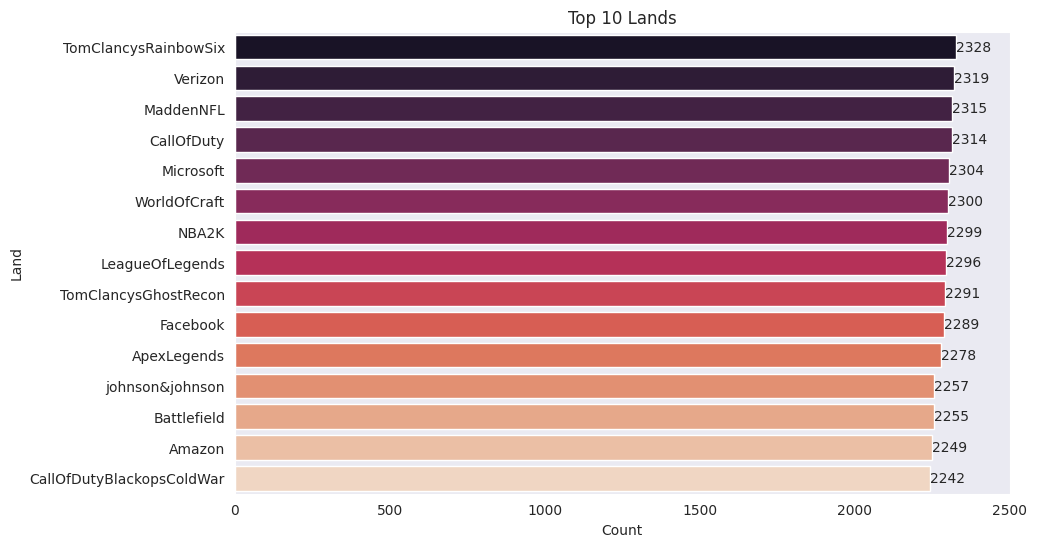

In [20]:
sns.set_style('dark')
plt.figure(figsize=(10,6))
bar = sns.barplot(x=temp_land.values[:15] ,y=temp_land.index[:15] , palette='rocket')
bar.bar_label(bar.containers[0])
plt.title('Top 10 Lands')
plt.xlabel('Count')
plt.ylabel('Land')
plt.xlim(0 , 2500)
plt.show()

In [21]:
# analysing tone feature
print('length :', len(df.Tone.unique()))
print('-------------------')
print(df.Tone.unique())

length : 4
-------------------
['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [22]:
temp_tone = df.Tone.value_counts()
temp_tone.to_frame()

,Tone
Negative,21698
Positive,19712
Neutral,17708
Irrelevant,12537


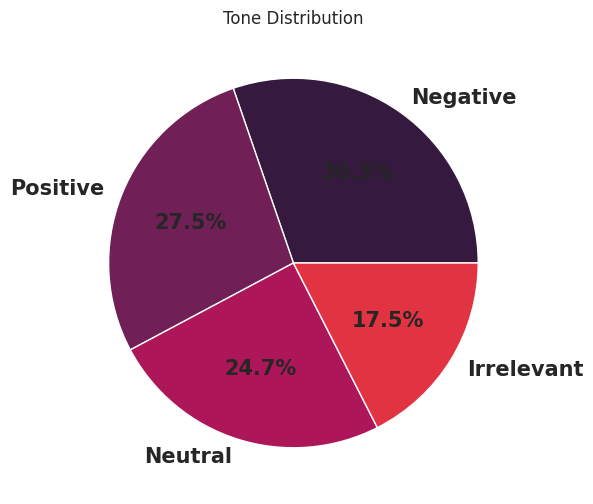

In [23]:
plt.figure(figsize=(6,6))
plt.pie(x = temp_tone.values , labels=temp_tone.keys() ,autopct="%1.1f%%" ,
textprops={"fontsize":15,"fontweight":"black"},colors=sns.color_palette("rocket"))
plt.title('Tone Distribution')
plt.show()

In [24]:
pd.crosstab(df.Tone , df.Land).T.style.background_gradient( subset=['Negative'],cmap='Reds')\
.background_gradient(subset=['Positive'] , cmap='Greens')\
.background_gradient(subset=['Irrelevant'] , cmap='BuGn')

Tone,Irrelevant,Negative,Neutral,Positive
Land,,,,
Amazon,185,565,1197,302
ApexLegends,185,574,913,606
AssassinsCreed,256,365,153,1382
Battlefield,907,445,342,561
Borderlands,238,415,581,971
CS-GO,620,335,523,717
CallOfDuty,660,861,367,426
CallOfDutyBlackopsColdWar,545,540,340,817
Cyberpunk2077,457,360,456,902


In [25]:
df.head(50)

,Index,Land,Tone,Tweets
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [26]:
df.tail(50)

,Index,Land,Tone,Tweets
74630,9192,Nvidia,Neutral,Save $500 buying the AERO 15 OLED - Award winn...
74631,9192,Nvidia,Neutral,Save $ 500 on the AERO 15 OLED - Edge Award 20...
74632,9192,Nvidia,Neutral,than $500 on the AERO VA OLED - Award winning ...
74633,9193,Nvidia,Positive,Love EVERYTHING about it .
74634,9193,Nvidia,Positive,Love EVERYTHING about it.
74636,9193,Nvidia,Positive,Love EVERYTHING about it �
74637,9193,Nvidia,Positive,22 Love EVERYTHING All about it.
74638,9193,Nvidia,Positive,Love EVERYTHING about anything.
74639,9194,Nvidia,Positive,"Checked for new GPU drivers today, went to the..."
74640,9194,Nvidia,Positive,"Today I searched for new GPU drivers, went to ..."


In [27]:
def clean_emoji(tx):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emojis
                           u"\U0001F300-\U0001F5FF"  # symbols
                           u"\U0001F680-\U0001F6FF"  # transport
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', tx)

In [43]:
def clean_text(tx):

    text = re.sub(r"won\'t", "would not", tx)
    text = re.sub(r"im", "i am", tx)
    text = re.sub(r"Im", "I am", tx)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"don\'t", "do not", text)
    text = re.sub(r"shouldn\'t", "should not", text)
    text = re.sub(r"needn\'t", "need not", text)
    text = re.sub(r"hasn\'t", "has not", text)
    text = re.sub(r"haven\'t", "have not", text)
    text = re.sub(r"weren\'t", "were not", text)
    text = re.sub(r"mightn\'t", "might not", text)
    text = re.sub(r"didn\'t", "did not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\!\?\.\@]',' ' , text)
    text = re.sub(r'[!]+' , '!' , text)
    text = re.sub(r'[?]+' , '?' , text)
    text = re.sub(r'[.]+' , '.' , text)
    text = re.sub(r'[@]+' , '@' , text)
    text = re.sub(r'unk' , ' ' , text)
    text = re.sub('\n', '', text)
    text = text.lower()
    text = re.sub(r'[ ]+' , ' ' , text)

    return text

In [46]:
random.seed(99)
text_testing =clean_text( random.choice(df['Tweets']))
text_testing = clean_emoji(test_text)
test_text

'ghost of tsushima is now graphically the best open world... red dead redemption 2 is one second ahead.'

In [47]:
#POS
doc = nlp(text_testing)
for token in doc :
    print(f'{token} => {token.pos_}')

ghost => NOUN
of => ADP
tsushima => PROPN
is => AUX
now => ADV
graphically => ADV
the => DET
best => ADV
open => ADJ
world => NOUN
... => PUNCT
red => ADJ
dead => ADJ
redemption => NOUN
2 => NUM
is => AUX
one => NUM
second => ADJ
ahead => ADV
. => PUNCT


In [48]:
# NER
doc = nlp(text_testing)
for chunk in doc.ents:
    print(f'{chunk} => {chunk.label_}')

tsushima => GPE
2 => CARDINAL
second => ORDINAL


In [49]:
# chunking
doc = nlp(text_testing)
for chunk in doc.noun_chunks:
    print(f'{chunk} => {chunk.label_}')

ghost => NP
tsushima => NP
the best open world => NP
red dead redemption => NP


In [51]:
# Tokenizer = TweetTokenizer()
Tokenizer=RegexpTokenizer(r'\w+')
test_text_tokenized = Tokenizer.tokenize(text_testing)
test_text_tokenized

['ghost',
 'of',
 'tsushima',
 'is',
 'now',
 'graphically',
 'the',
 'best',
 'open',
 'world',
 'red',
 'dead',
 'redemption',
 '2',
 'is',
 'one',
 'second',
 'ahead']

array([[1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

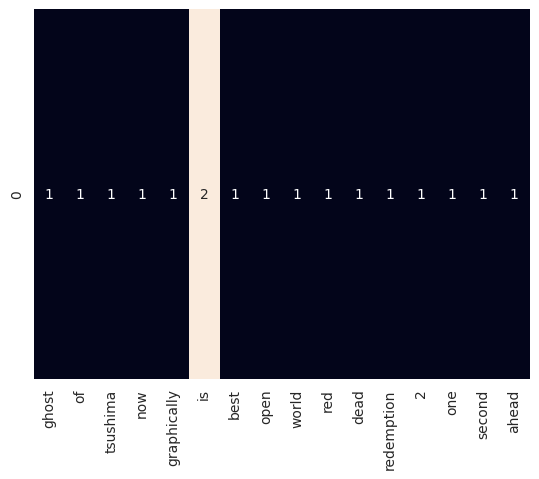

In [52]:
# Count vectorizer
words  = ['ghost','of','tsushima','now','graphically','is','best','open','world','red','dead','redemption','2','one','second','ahead']
counter_vectorizer = CountVectorizer()
transform = counter_vectorizer.fit_transform([text_testing]).toarray()
sns.heatmap(transform, annot=True,xticklabels=words,
        cbar=False)
transform

array([[0.22941573, 0.22941573, 0.22941573, 0.22941573, 0.22941573,
        0.45883147, 0.22941573, 0.22941573, 0.22941573, 0.22941573,
        0.22941573, 0.22941573, 0.22941573, 0.22941573, 0.22941573,
        0.22941573]])

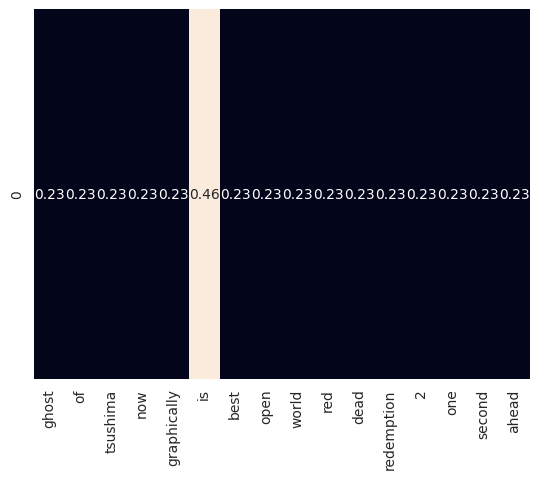

In [53]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
words  = ['ghost','of','tsushima','now','graphically','is','best','open','world','red','dead','redemption','2','one','second','ahead']
TF_IDF = TfidfVectorizer()
transform = TF_IDF.fit_transform([test_text]).toarray()
sns.heatmap(transform, annot=True,xticklabels=words,
        cbar=False)
transform

In [54]:
#n-Grams
def n_grams(text, n):

    return [text[i:i+n] for i in range(len(text)-n+1)]
cleaned = test_text_tokenized
n_grams(cleaned, 3)

[['ghost', 'of', 'tsushima'],
 ['of', 'tsushima', 'is'],
 ['tsushima', 'is', 'now'],
 ['is', 'now', 'graphically'],
 ['now', 'graphically', 'the'],
 ['graphically', 'the', 'best'],
 ['the', 'best', 'open'],
 ['best', 'open', 'world'],
 ['open', 'world', 'red'],
 ['world', 'red', 'dead'],
 ['red', 'dead', 'redemption'],
 ['dead', 'redemption', '2'],
 ['redemption', '2', 'is'],
 ['2', 'is', 'one'],
 ['is', 'one', 'second'],
 ['one', 'second', 'ahead']]

In [60]:
#stop Words
stopwords_list = stopwords.words('english')
print(f'There are {len(stopwords_list) } stop words')
print('**' * 20 , '\n20 of them are as follows:\n')
for inx , value in enumerate(stopwords_list[:20]):
    print(f'{inx+1}:{value}')

There are 179 stop words
**************************************** 
20 of them are as follows:

1:i
2:me
3:my
4:myself
5:we
6:our
7:ours
8:ourselves
9:you
10:you're
11:you've
12:you'll
13:you'd
14:your
15:yours
16:yourself
17:yourselves
18:he
19:him
20:his


In [65]:
def make_corpus(kind):
    corpus = []
    for text in df.loc[df['Mode']==kind]['Text'].str.split():
        for word in text:
            corpus.append(word)
    return corpus

In [ ]:
%%time
stop = stopwords.words('english')
sentiments = list(df.Tone.unique())



for inx , value in enumerate(sentiments):

    corpus = make_corpus(value)

    dic = defaultdict(int)

    for word in corpus:
        if word in stop:
            dic[word] += 1

    top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]

    x, y = zip(*top)
    plt.title(f'{value} ')
    plt.bar(x , y)
    plt.show()

In [63]:
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

In [ ]:
%%time
stop = stopwords.words('english')
sentiment = list(df.Tone.unique())



for inx , value in enumerate(sentiment):

    corpus = make_corpus(value)

    dic = defaultdict(int)

    for word in corpus:
        if word in stop:
            dic[word] += 1

    top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]

    x, y = zip(*top)
    plt.title(f'{value} ')
    plt.bar(x , y)
    plt.show()

In [70]:
df

,Index,Land,Tone,Tweets
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
